In [2]:
#Клюшніченко 
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Завантаження датасету iris
iris = load_iris()
X = iris.data

# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Yuppd_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Yuppd_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Yuppd_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Yuppd_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

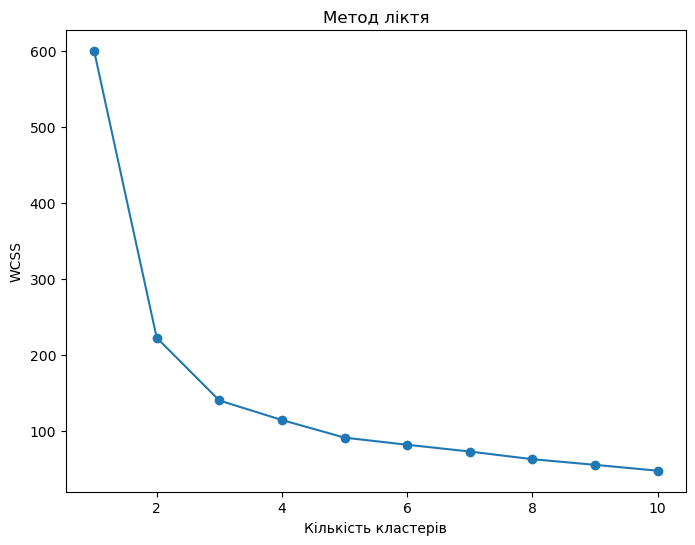

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Використаємо метод ліктя для визначення оптимальної кількості кластерів
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ - це сума квадратів відстаней до центрів кластерів

# Побудова графіка методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

In [6]:
from sklearn.metrics import silhouette_score

# Спробуємо кластеризацію з кількістю кластерів 2, 3 і 4
for n_clusters in [2, 3, 4]:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.predict(X_scaled)
    
    # Оцінка якості кластеризації за допомогою метрики силуету
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Кількість кластерів = {n_clusters}, середнє значення силуету = {silhouette_avg}")

C:\Users\Yuppd_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Кількість кластерів = 2, середнє значення силуету = 0.5817500491982808


C:\Users\Yuppd_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Кількість кластерів = 3, середнє значення силуету = 0.45994823920518635


C:\Users\Yuppd_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Кількість кластерів = 4, середнє значення силуету = 0.38694104154427816


C:\Users\Yuppd_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


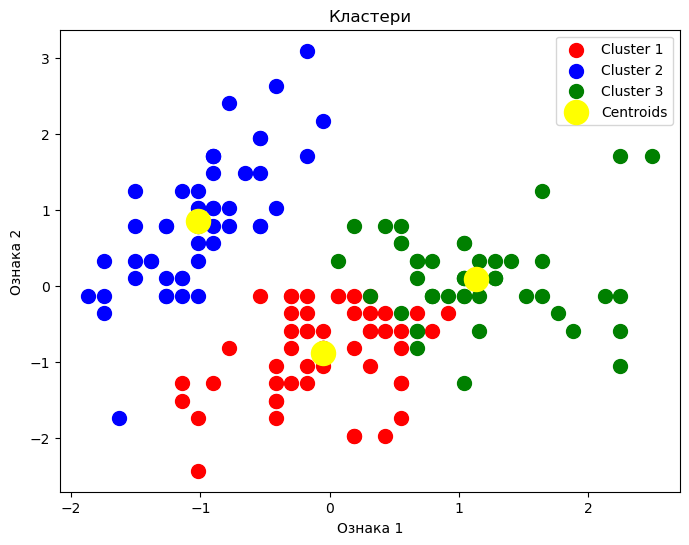

In [8]:
# Використаємо 3 кластери (оптимальне значення за методом ліктя або силуетів)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

# Візуалізація результатів кластеризації (перших двох ознак для зручності)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Відображення центрів кластерів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Кластери')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.legend()
plt.show()

In [10]:
# Висновки: Метод ліктя показав, що оптимальна кількість кластерів становить 3 (на графіку видно чіткий "лікоть"). Метод силуетів підтвердив, що кластеризація з 3 кластерами дає високу якість кластеризації.